In [1]:
##############################################################
############### Examining average performance across experimental connditionns. MD ablation, vmPFC ablation and with and without OFC
##############################################################
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

import matplotlib.pyplot as plt
import numpy as np
import os, re
import pickle
from tqdm import tqdm

file_format= 'JPG'


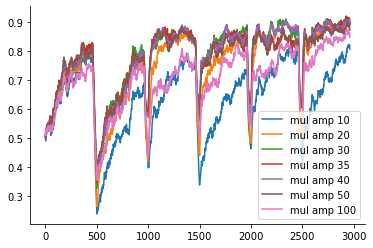

In [2]:

exp_name = 'mul_amp/MD_ablation'
results_folder = './../results2/'
#get files
files = os.listdir( results_folder  + exp_name+'/')
corrects_files = [file for file in files if 'Corrects' in file]

regexes = [f"\d_{float(amp):1.1f}_1.3" for amp in [10, 20, 30, 35, 40, 50, 100]] # 0, 1, 2 ,3,4 ,5, 
labels = [f'mul amp {amp}' for amp in [10, 20, 30, 35, 40, 50, 100]]


ax = plt.gca()
means, stds = [], []
for label, regex in zip (labels, regexes):
    comp_files =  [os.path.join(results_folder+exp_name,file) for file in corrects_files if re.search(regex, file)] 
    if len(comp_files) > 0:    
        smooth_performances = [np.convolve(np.load(c1f), np.ones((40,))/40, mode='valid') for c1f in comp_files]
        sp = np.stack(smooth_performances)
        spmean = np.mean(sp, axis=0)    
        spstd = np.std(sp, axis=0)    
        means.append(spmean)
        stds.append(spstd)
        ax.plot(range(len(spmean)), spmean, label=label)
        # ax.fill_between(range(len(spmean)), spmean-spstd, spmean+spstd, alpha=.4)
    else:
        print(f'no files found for {label}')
ax.legend()
# plt.savefig(f'./exports/mul_amp2.{file_format}', format=file_format, dpi=300)


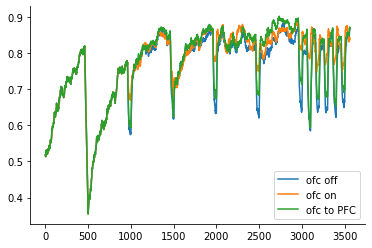

In [7]:

exp_name = 'ofc/OFC_ablation'
results_folder = './../results2/'
#get files
files = os.listdir( results_folder  + exp_name+'/')
corrects_files = [file for file in files if 'Corrects' in file]

vars = [0, 1]
regexes = [f"\d_{float(amp):1.1f}_1.3" for amp in vars]  
labels = [f"ofc {'on' if amp> 0 else 'off'}" for amp in vars]
regexes+= [f"\d_{1:1.1f}_1.0"]
labels += ["ofc to PFC"]

ax = plt.gca()
means, stds = [], []
for label, regex in zip (labels, regexes):
    comp_files =  [os.path.join(results_folder+exp_name,file) for file in corrects_files if re.search(regex, file)] 
    if len(comp_files) > 0:    
        smooth_performances = [np.convolve(np.load(c1f), np.ones((40,))/40, mode='valid') for c1f in comp_files]
        sp = np.stack(smooth_performances)
        spmean = np.mean(sp, axis=0)    
        spstd = np.std(sp, axis=0)    
        means.append(spmean)
        stds.append(spstd)
        ax.plot(range(len(spmean)), spmean, label=label)
        # ax.fill_between(range(len(spmean)), spmean-spstd, spmean+spstd, alpha=.4)
    else:
        print(f'no files found for {label}')
ax.legend()
# plt.savefig(f'./exports/ofc.{file_format}', format=file_format, dpi=300)